In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [16]:
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/Monk5088/College-project/master/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

1.age: The person's age in years

2.sex: The person's sex (1 = male, 0 = female)

3.cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5.chol: The person's cholesterol measurement in mg/dl

6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach: The person's maximum heart rate achieved

9.exang: Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca: The number of major vessels (0-3)

14.target: Heart disease (0 = no, 1 = yes)


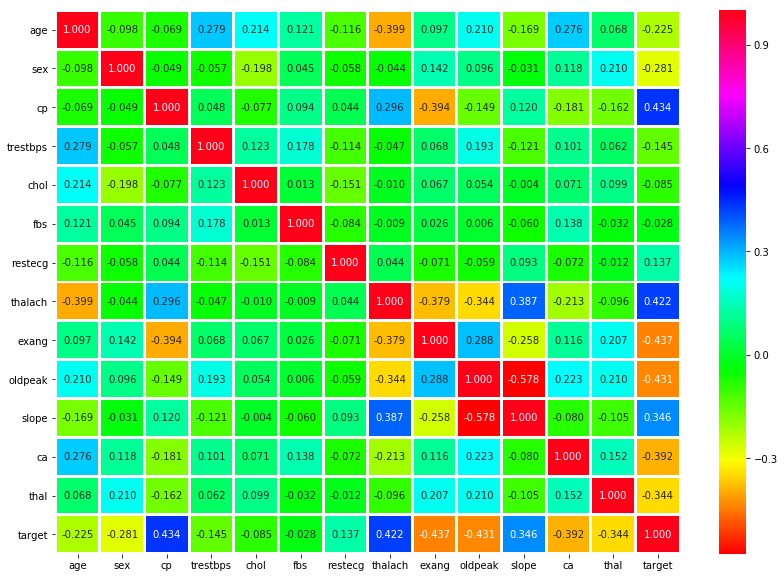

In [20]:
df.describe()
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [21]:
df.groupby('cp',as_index=False)['target'].mean()

,cp,target
0,0,0.272727
1,1,0.820000
2,2,0.793103
3,3,0.695652


In [22]:
df.groupby('slope',as_index=False)['target'].mean()

,slope,target
0,0,0.428571
1,1,0.350000
2,2,0.753521


In [23]:
df.groupby('thal',as_index=False)['target'].mean()

,thal,target
0,0,0.500000
1,1,0.333333
2,2,0.783133
3,3,0.239316


In [25]:
df.groupby('target').mean()   

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


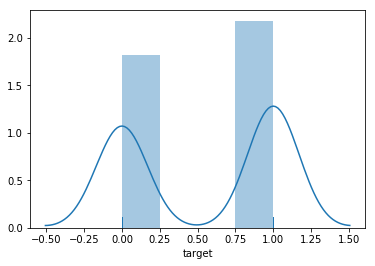

In [26]:
sns.distplot(df['target'],rug=True)
plt.show()

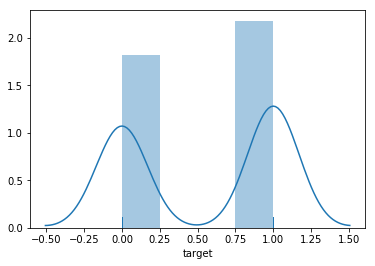

In [27]:
sns.distplot(df['target'],rug=True)
plt.show()

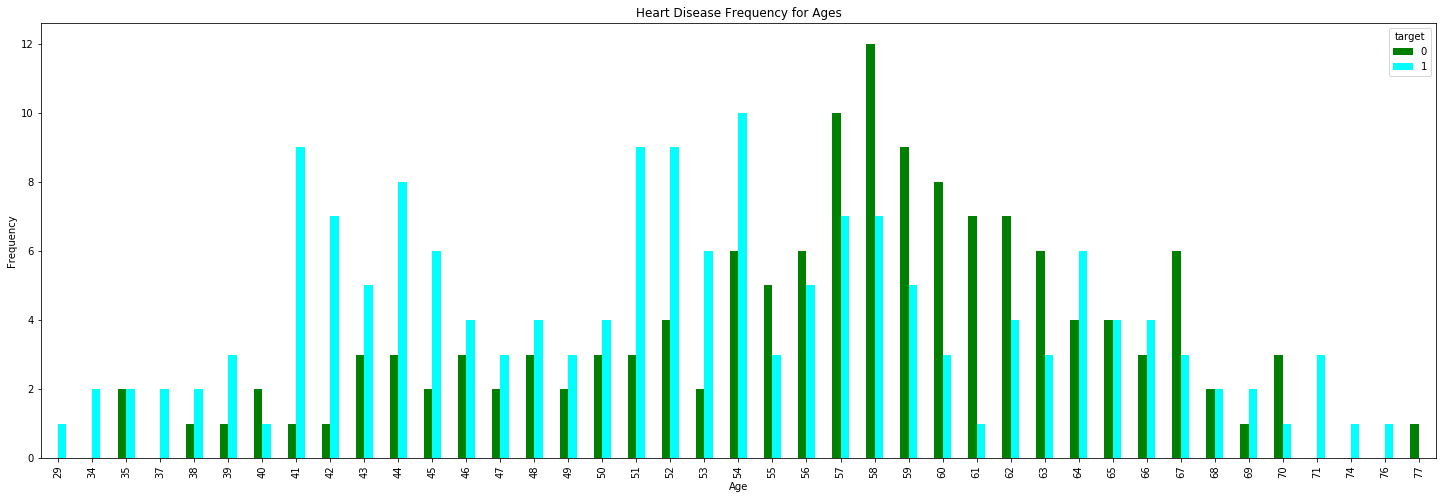

In [28]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(25,8),color=['green','cyan' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

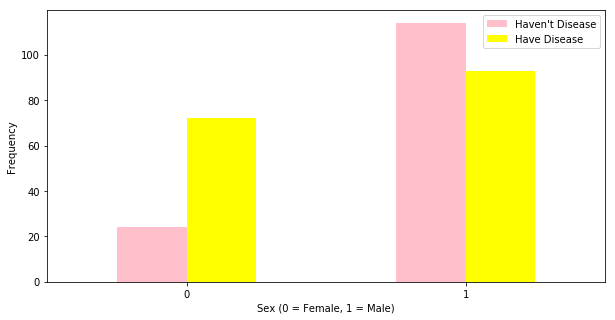

In [29]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['pink','yellow' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Relation of tresbps with target')

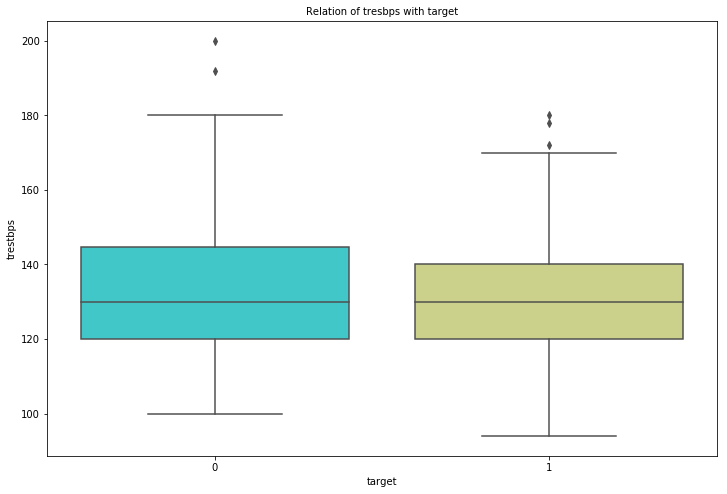

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(df['target'], df['trestbps'], palette = 'rainbow')
plt.title('Relation of tresbps with target', fontsize = 10)

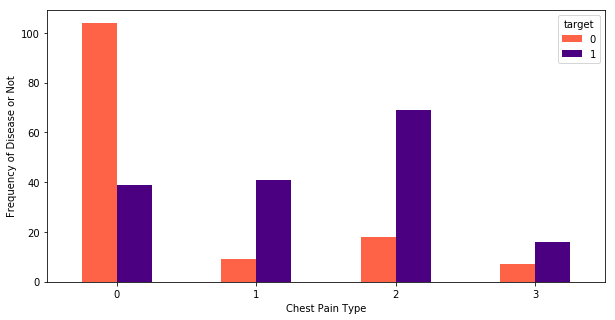

In [31]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

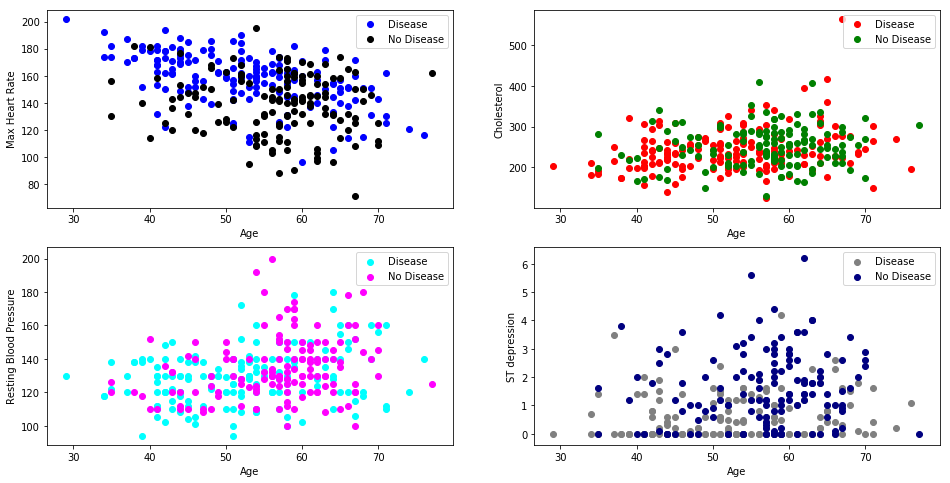

In [32]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],c='blue')
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],c='black')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=df.age[df.target==1],y=df.chol[df.target==1],c='red')
plt.scatter(x=df.age[df.target==0],y=df.chol[df.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=df.age[df.target==1],y=df.trestbps[df.target==1],c='cyan')
plt.scatter(x=df.age[df.target==0],y=df.trestbps[df.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=df.age[df.target==1],y=df.oldpeak[df.target==1],c='grey')
plt.scatter(x=df.age[df.target==0],y=df.oldpeak[df.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()

In [33]:
chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
rest_ecg=pd.get_dummies(df['restecg'],prefix='restecg')
frames=[df,sp,th,rest_ecg]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal','restecg'],axis=1,inplace=True)

In [34]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

In [37]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 11, init = 'uniform', activation = 'relu', input_dim = 22))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 11, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [38]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6946 - acc: 0.5413
Epoch 2/100
242/242 [==============================] - 0s 301us/step - loss: 0.6900 - acc: 0.5413
Epoch 3/100
242/242 [==============================] - 0s 292us/step - loss: 0.6896 - acc: 0.5413
Epoch 4/100
242/242 [==============================] - 0s 293us/step - loss: 0.6886 - acc: 0.5413
Epoch 5/100
242/242 [==============================] - 0s 251us/step - loss: 0.6861 - acc: 0.5413
Epoch 6/100
242/242 [==============================] - 0s 293us/step - loss: 0.6834 - acc: 0.5413
Epoch 7/100
242/242 [==============================] - 0s 243us/step - loss: 0.6813 - acc: 0.5413
Epoch 8/100
242/242 [==============================] - 0s 251us/step - loss: 0.6740 - acc: 0.5702
Epoch 9/100
242/242 [==============================] - 0s 251us/step - loss: 0.6701 - acc: 0.5992
Epoch 10/100
242/242 [==============================] - 0s 284us/step - loss: 0.6408 - acc: 0.6818
Epoch 11/100
242/242 

242/242 [==============================] - 0s 292us/step - loss: 0.3531 - acc: 0.8554
Epoch 84/100
242/242 [==============================] - 0s 259us/step - loss: 0.3612 - acc: 0.8388
Epoch 85/100
242/242 [==============================] - 0s 292us/step - loss: 0.3587 - acc: 0.8512
Epoch 86/100
242/242 [==============================] - 0s 251us/step - loss: 0.3558 - acc: 0.8636
Epoch 87/100
242/242 [==============================] - 0s 242us/step - loss: 0.3599 - acc: 0.8388
Epoch 88/100
242/242 [==============================] - 0s 292us/step - loss: 0.3668 - acc: 0.8430
Epoch 89/100
242/242 [==============================] - 0s 301us/step - loss: 0.3586 - acc: 0.8554
Epoch 90/100
242/242 [==============================] - 0s 242us/step - loss: 0.3571 - acc: 0.8430
Epoch 91/100
242/242 [==============================] - 0s 246us/step - loss: 0.3772 - acc: 0.8471
Epoch 92/100
242/242 [==============================] - 0s 231us/step - loss: 0.3471 - acc: 0.8471
Epoch 93/100
242/242 [=

accuracy of the model:  0.819672131147541


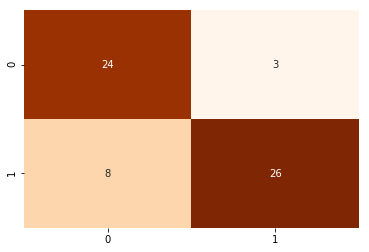

In [39]:
y_pred = classifier.predict(X_test)
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)